In [4]:
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import BatchNormalization
from keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import pandas as pd
import numpy as np

# Reading feature vector from file
raw_data = pd.read_csv('input_final.csv')
raw_data.columns = ["F"+str(i) for i in range(1, len(raw_data.columns) + 1)]
# raw_data = raw_data.sample(frac=1)
print(raw_data.head())
# Pre-processing the data
features = raw_data.copy()
features = features.iloc[:,:-1]
labels = raw_data.iloc[:,-1:]

print(features.head())
print(labels.head())

features = np.array(features)
print(features)
labels = np.array(labels)


#  Load the dataset
# (x_train, y_train) = (features , labels)
# (x_test, y_test) = (features , labels)

# # Display our data shape/dimensions
# print('x_train shape:', x_train.shape)
# print(x_train.shape[0], 'train samples')
# print(x_test.shape[0], 'test samples')

# # Now we one hot encode outputs
# ytori = y_train
# num_classes = 2
# y_train = to_categorical(y_train, num_classes)
# y_test = to_categorical(y_test, num_classes)


           F1         F2         F3  ...         F79         F80  F81
0  117.022451  95.567316  77.702550  ...  563.138096  372.219223    1
1   40.962661  38.385066  32.198439  ...   66.484803   63.115706    1
2   42.924978  39.831538  34.121057  ...   63.761359   52.928770    1
3   36.683007  36.746411  30.111912  ...   57.602285   56.224384    1
4   38.713092  35.626802  30.483209  ...   57.926560   57.894936    1

[5 rows x 81 columns]
           F1         F2         F3  ...        F78         F79         F80
0  117.022451  95.567316  77.702550  ...  73.861975  563.138096  372.219223
1   40.962661  38.385066  32.198439  ...   9.607606   66.484803   63.115706
2   42.924978  39.831538  34.121057  ...  11.482237   63.761359   52.928770
3   36.683007  36.746411  30.111912  ...   6.235513   57.602285   56.224384
4   38.713092  35.626802  30.483209  ...   8.840690   57.926560   57.894936

[5 rows x 80 columns]
   F81
0    1
1    1
2    1
3    1
4    1
[[117.02245146  95.56731638  77.7025

In [5]:
# Initialize model
model = Sequential()


# 1 FC Layer
model.add(Dense(100))
# model.add(BatchNormalization())
model.add(Activation('relu'))
# model.add(Dropout(0.2))

# # 2 FC Layer
model.add(Dense(50))
# model.add(BatchNormalization())
model.add(Activation('relu'))
# model.add(Dropout(0.2))

# # 3 FC Layer
# model.add(Dense(128))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(Dropout(0.5))


# # 4 FC Layer
# model.add(Dense(256))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(Dropout(0.5))


# # 5 FC Layer
# model.add(Dense(128))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(Dropout(0.5))


# 6 FC Layer
# model.add(Dense(7))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(Dropout(0.2))


# 7 FC Layer
model.add(Dense(10))
# model.add(BatchNormalization())
model.add(Activation('relu'))
# model.add(Dropout(0.2))


# 8 FC Layer
model.add(Dense(1))
# model.add(BatchNormalization())
model.add(Activation('sigmoid'))


model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

#print(model.summary())


In [6]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
batch_size = 1
epochs = 50

checkpoint = ModelCheckpoint("Checkpoint.h5",
                             monitor="accuracy",
                             mode="max",
                             save_best_only = True,
                             verbose=0)

earlystop = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 5, 
                          verbose = 1,
                          restore_best_weights = True)

callbacks = [checkpoint]

In [7]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, shuffle=True)

In [8]:
for train, test in kfold.split(features, labels):
    history = model.fit(features[train], labels[train],
            batch_size=batch_size,
            epochs=epochs,
            verbose=0,
            validation_data = (features[test], labels[test]),
            callbacks = callbacks)


    scores = model.evaluate(features[test], labels[test], verbose=1)
    print('Test loss:', scores[0])
    print('Test accuracy:', scores[1])

1/1 [==============================] - 0s 213ms/step - loss: 0.4370 - accuracy: 0.8571
Test loss: 0.43701478838920593
Test accuracy: 0.8571428656578064
1/1 [==============================] - 0s 18ms/step - loss: 1.0877 - accuracy: 0.7143
Test loss: 1.087722659111023
Test accuracy: 0.7142857313156128
1/1 [==============================] - 0s 20ms/step - loss: 0.8553 - accuracy: 0.5714
Test loss: 0.8552594780921936
Test accuracy: 0.5714285969734192
1/1 [==============================] - 0s 20ms/step - loss: 0.2149 - accuracy: 0.8571
Test loss: 0.2149108499288559
Test accuracy: 0.8571428656578064
1/1 [==============================] - 0s 19ms/step - loss: 0.3589 - accuracy: 0.8571
Test loss: 0.3588659167289734
Test accuracy: 0.8571428656578064
1/1 [==============================] - 0s 21ms/step - loss: 0.0285 - accuracy: 1.0000
Test loss: 0.028477182611823082
Test accuracy: 1.0
1/1 [==============================] - 0s 19ms/step - loss: 0.0190 - accuracy: 1.0000
Test loss: 0.0189687553793

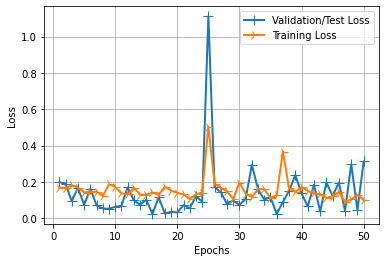

In [15]:
# Plotting our loss charts
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()




In [9]:
nmodel = keras.models.load_model('Checkpoint.h5')


In [10]:
print(nmodel.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               8100      
_________________________________________________________________
activation (Activation)      (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
activation_1 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1

In [11]:
scores = nmodel.evaluate(features, labels, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

3/3 [==============================] - 0s 5ms/step - loss: 0.1091 - accuracy: 0.9571
Test loss: 0.10910926014184952
Test accuracy: 0.9571428298950195


In [13]:
nmodel.predict(np.array([features[0]]))

array([[0.99998975]], dtype=float32)

In [14]:
labels[0]

array([1])